In [1]:
# Import modules
# Make sure you have installed netCDF4, xarray, and nc-time-axis  
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Prerequisites

# Load modulesimport numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
# 打开文件
ds= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
ds




<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
#1.1
#选择区域
ds_r = ds.sel(lat=slice(-5,5), lon=slice(190,240))
ds_r

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [5]:
#计算每月sst的均值
ds_monthly=ds_r.sst.groupby(ds.time.dt.month).mean(dim=['lat', 'lon','time'])
# ds_monthly=ds.sst.groupby(ds.time.dt.year.month).mean()
ds_monthly

<xarray.DataArray 'sst' (month: 12)>
array([26.56812 , 26.742603, 27.239906, 27.694029, 27.79552 , 27.598068,
       27.199274, 26.824581, 26.7382  , 26.717516, 26.693666, 26.61345 ],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

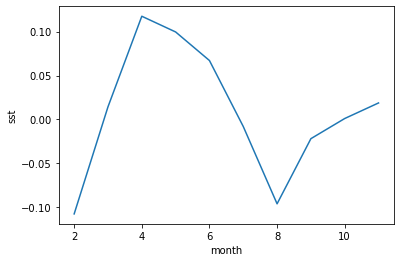

In [6]:
#1.1
#借鉴https://www.cnblogs.com/traditional/p/13776180.html
#计算Niño 3.4
ds_rol = ds_monthly.rolling(month=3, center=True).mean()

ds_rol
#计算异常值作图
sst_an=ds_monthly-ds_rol
sst_an
sst_an.plot()

#1.2
#借鉴https://www.cnblogs.com/Gaoqiking/p/11069517.html
# plt.plot(ds_monthly.month,sst_an)
# plt.fill_between(ds_monthly.month.to_numpy(),sst_an,where=(sst_an>0),color='red')
# plt.fill_between(ds_monthly.month.to_numpy(),sst_an,where=(sst_an<0),color='blue')
# #按照月分组后，年不见了不清楚如何将每年的各个月分组进行计算



In [7]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds
#2.1
#绘制长、短和太阳辐射波的均值2D图
# long=ds.toa_lw_all_mon.mean(dim='time')
# long.plot()
# # short=ds.toa_sw_all_mon.mean(dim='time')
# short.plot()
# solar=ds.solar_mon.mean(dim='time')
# solar.plot()

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

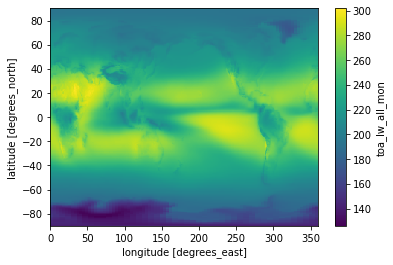

In [8]:
#2.1
#一开始不太理解，向谢栋学姐请教相关问题
#绘制长、短和太阳辐射波的均值2D图
long=ds.toa_lw_all_mon.mean(dim='time')
long.plot()
# short=ds.toa_sw_all_mon.mean(dim='time')
# short.plot()
# solar=ds.solar_mon.mean(dim='time')
# solar.plot()

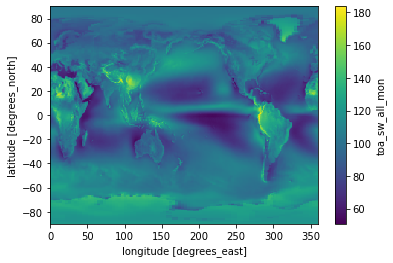

In [37]:
short=ds.toa_sw_all_mon.mean(dim='time') 
short.plot()

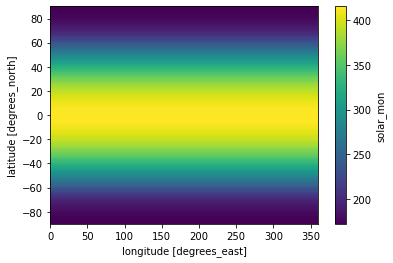

In [60]:
solar=ds.solar_mon.mean(dim='time')
solar.plot()

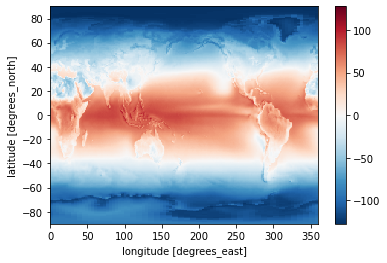

In [69]:
# ds1=ds.solar_mon.mean(dim="time")-ds.toa_lw_all_mon.mean(dim="time")-ds.toa_sw_all_mon.mean(dim="time")
#TOA net=solar-long-short
add=solar-long-short
add.plot()

# ds1.plot()

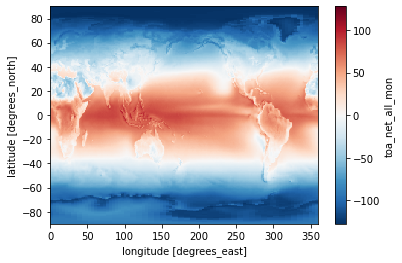

In [9]:
#绘制TOA net的图
toa_net=ds.toa_net_all_mon.mean(dim='time')
toa_net.plot()
#TOA的图与三种波长相叠加的图相同

In [10]:
#2.2
#太阳光发射的
launch=ds.solar_mon.mean(dim='time')
#创建加权
weights=np.cos(np.deg2rad(ds.lat))
# launch
w_solar=solar.weighted(weights)
w_long=long.weighted(weights)
w_short=short.weighted(weights)

# 计算总的均值
w_solar_mean=w_solar.mean()
w_long_mean=w_long.mean()
w_short_mean=w_short.mean()
print(w_solar_mean,w_long_mean,w_short_mean)

NameError: name 'solar' is not defined

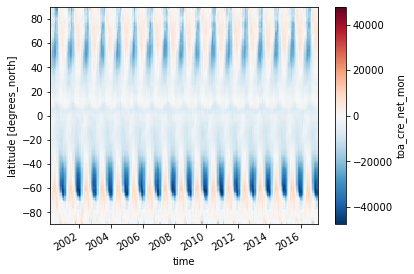

In [87]:
#2.3
#以经度为基准进行求和并绘图
ra_sum=ds.toa_cre_net_mon.sum(dim='lon')
ra_sum.transpose().plot()


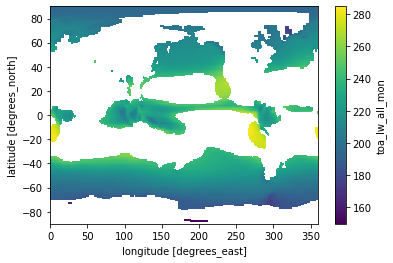

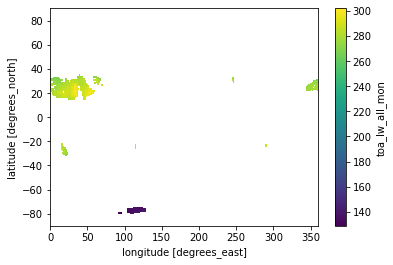

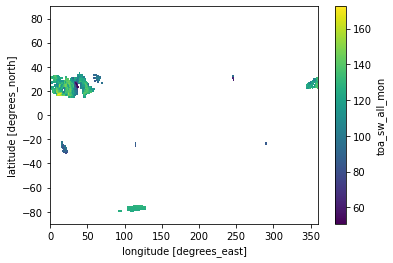

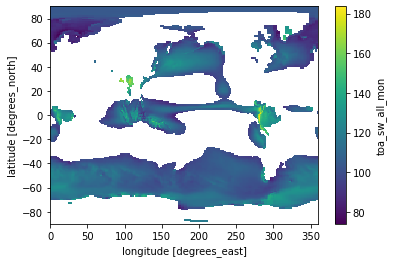

In [11]:
#2.4
#计算平均云面积
cldarea = ds.cldarea_total_daynight_mon.mean(dim='time')
high_area = (cldarea>=75)
low_area = (cldarea<=25)

#计算长波和短波的平均辐射值
long_v=ds.toa_lw_all_mon.mean(dim='time')
short_v=ds.toa_sw_all_mon.mean(dim='time')

#绘图
long_v.where(high_area).plot()
plt.show()
long_v.where(low_area).plot()
plt.show()
short_v.where(low_area).plot()
plt.show()
short_v.where(high_area).plot()
plt.show()


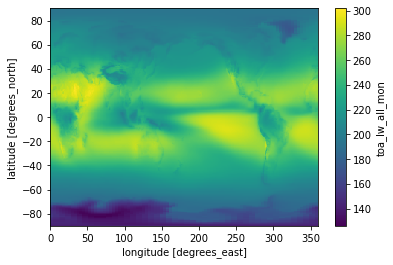

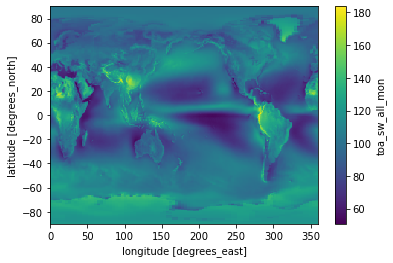

In [12]:
#2.5
#计算短波和长波全球的平均值
long_t=ds.toa_lw_all_mon.mean(dim='time')
short_t=ds.toa_sw_all_mon.mean(dim='time')

#计算云面积的平均值
cldarea = ds.cldarea_total_daynight_mon.mean(dim='time')

#绘图
long_v.where(cldarea).plot()
plt.show()

short_v.where(cldarea).plot()
plt.show()

In [13]:

# 打开文件
ds = xr.open_dataset("sst.mnmean.nc")
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2014, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-10-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-11-04

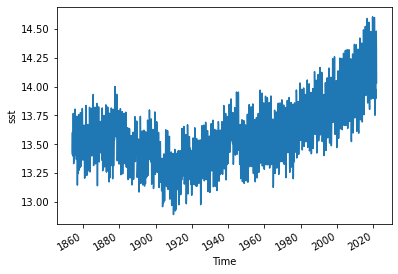

In [14]:
#没有找到正确的方法下载带有连续时间的数据文件，所以应用了之前老师上传的一个数据文件
#3.1
ds.sst.mean(dim=['lat','lon']).transpose().plot()




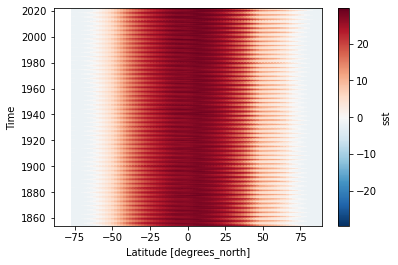

In [15]:
#3.2
ds.sst.mean(dim='lon').plot()
plt.show()

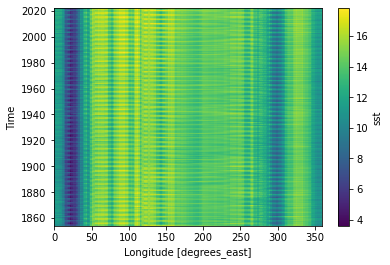

In [16]:
#3.2
ds.sst.mean(dim='lat').plot()
plt.show()

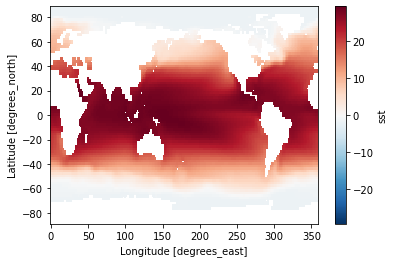

In [17]:
#3.2
ds.sst.mean(dim='time').plot()
plt.show()

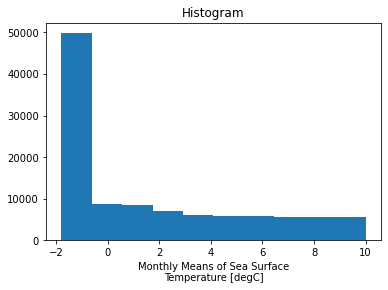

In [18]:
#3.2
data = ds.sst.sel(time=slice('2013-01-01', '2014-12-31'))
data1 = data.where(data < 10)
data1.plot()
plt.show()

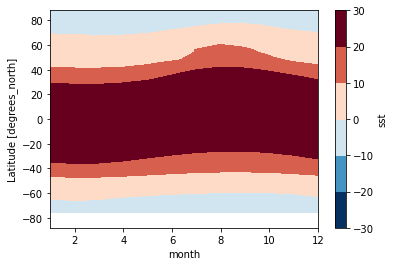

In [19]:
ds.sst.groupby('time.month').mean().mean(dim='lon').transpose().plot.contourf()
plt.show()